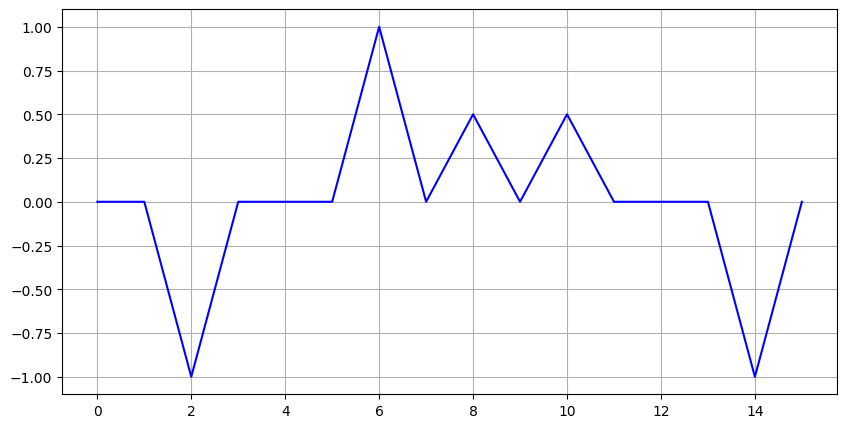

In [1]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Binary Data
data = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

# Parameters
N = 4  # Number of OFDM subcarriers
num_symbols = int(len(data) / N)  # Number of OFDM symbols

# OFDM Modulation
data_matrix = np.reshape(data, (num_symbols, N))  
QAM = 2*data_matrix - 1  # BPSK modulation
ofdm_symbols = ifft(QAM, N)  # IFFT

# Plot
plt.figure(figsize=(10,5))
plt.plot(ofdm_symbols.flatten().real, 'b')
plt.grid(True)
plt.show()


In [2]:
# OFDM Demodulation
received_QAM = fft(ofdm_symbols, N)  # FFT 
received_data_matrix = np.where(received_QAM.real > 0, 1, 0)  # BPSK demodulation
received_data = np.reshape(received_data_matrix, -1)  # Original data shape

# Results
print('Original Data: ', data)
print('Received Data: ', received_data)


Original Data:  [0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1]
Received Data:  [0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1]
